In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
saurabhshahane_seoul_bike_sharing_demand_prediction_path = kagglehub.dataset_download('saurabhshahane/seoul-bike-sharing-demand-prediction')

print('Data source import complete.')


Data source import complete.


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy

In [3]:
# warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Models and Utils
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# tensorflow modules
import tensorflow as tf

In [5]:
# Loading dataset
df = pd.read_csv(f"{saurabhshahane_seoul_bike_sharing_demand_prediction_path}/SeoulBikeData.csv",
                 encoding='utf-8',
                 encoding_errors='ignore')

df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# changing the column names
column_names = ["Date" , "Rented_Bike_Count" , "Hour" , "Temprature" , "Humidity" , "Wind_Speed" , "Visibility" , "Dew_Point_Temprature" , "Solar_Radiation" , "Rainfall" , "Snowfall" , "Seasons" , "Holiday" , "Functional_Day"]

df.columns = column_names

df.head()

,Date,Rented_Bike_Count,Hour,Temprature,Humidity,Wind_Speed,Visibility,Dew_Point_Temprature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functional_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# dropping non - required columns
df.drop(columns = ["Date" , "Seasons" , "Holiday" ] , inplace = True)

df.head()

,Rented_Bike_Count,Hour,Temprature,Humidity,Wind_Speed,Visibility,Dew_Point_Temprature,Solar_Radiation,Rainfall,Snowfall,Functional_Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [8]:
# encoding the target variable
df["Functional_Day"] = (df["Functional_Day"] == True).astype("int")
df = df[df["Hour"] == 12]
df = df.drop("Hour" , axis = 1)

In [9]:
df.head()

,Rented_Bike_Count,Temprature,Humidity,Wind_Speed,Visibility,Dew_Point_Temprature,Solar_Radiation,Rainfall,Snowfall,Functional_Day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,0
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,0
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,0
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,0
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,0


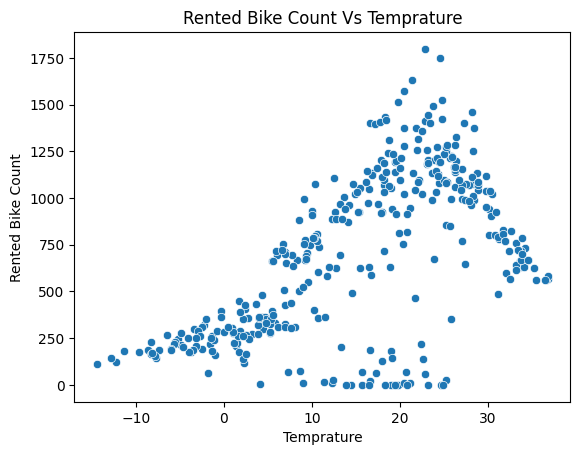

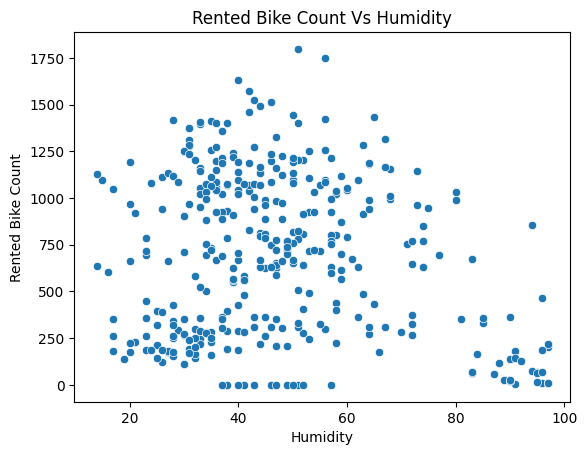

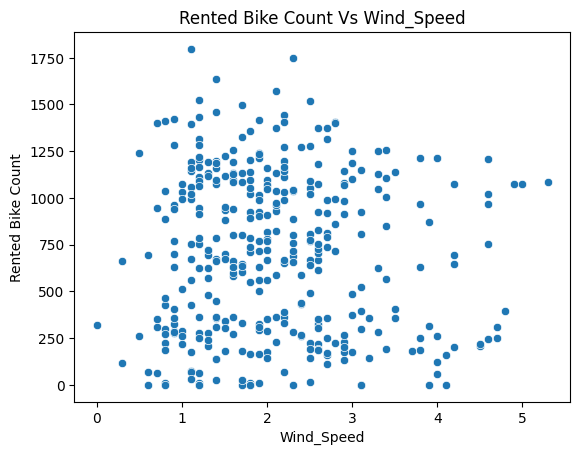

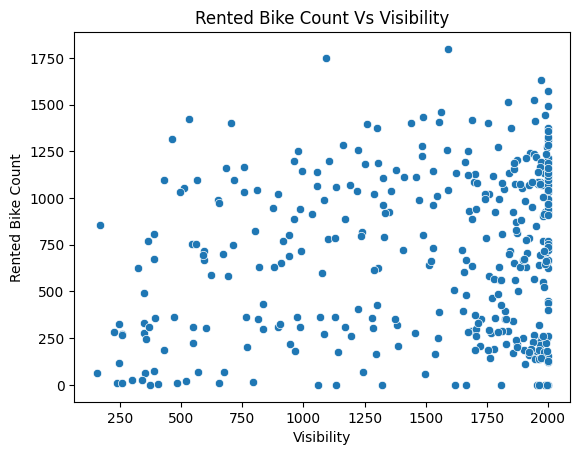

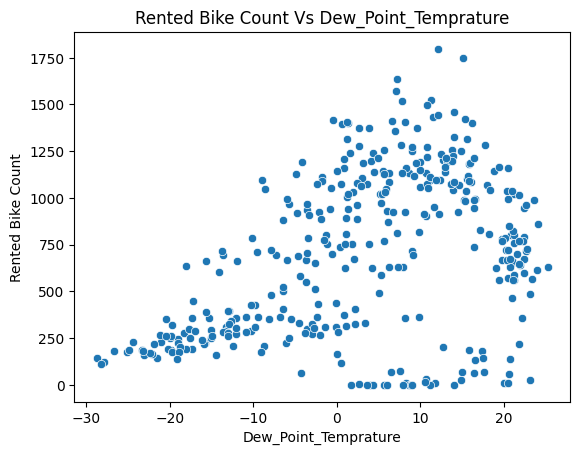

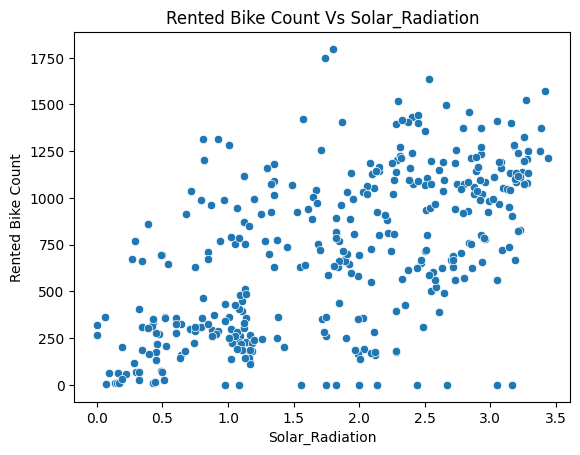

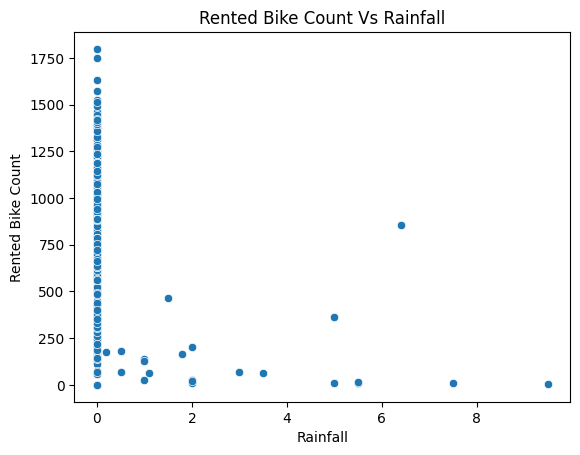

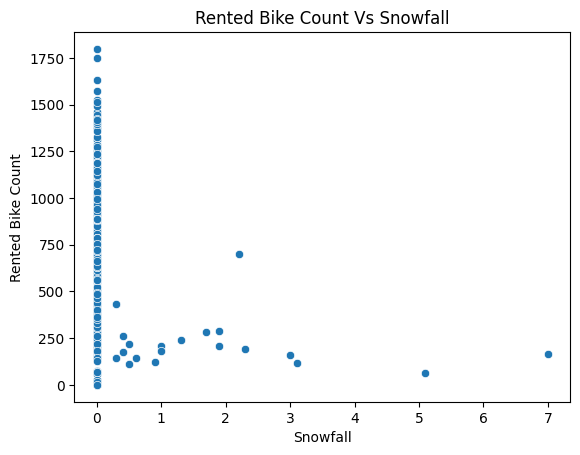

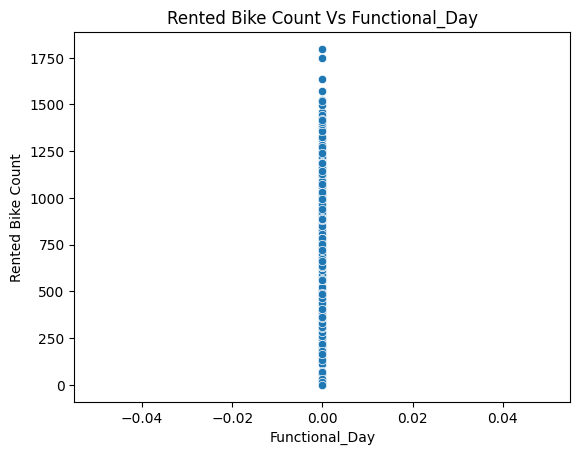

In [10]:
# plotting the target variable and Features
for col in df.columns[1:]:
    sns.scatterplot(x = col , y = "Rented_Bike_Count" , data = df )
    plt.title(f"Rented Bike Count Vs {col}")
    plt.ylabel("Rented Bike Count")
    plt.xlabel(col)
    plt.show()

In [11]:
# dropping more columns
df.drop(columns = ["Wind_Speed" , "Visibility" , "Functional_Day"] , inplace = True)

In [12]:
df.head()

,Rented_Bike_Count,Temprature,Humidity,Dew_Point_Temprature,Solar_Radiation,Rainfall,Snowfall
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [13]:
# Spliting Data
# Train , Test , Split
train , valid , test = np.split(df.sample(frac = 1)  , [int(0.6 * len(df)) , int(0.8 * len(df))])

In [14]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [15]:
# Considering Simple Regression Model
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_temp, y_train_temp = get_xy(train, "Rented_Bike_Count", x_labels=["Temprature"])
_, X_val_temp, y_val_temp = get_xy(valid, "Rented_Bike_Count", x_labels=["Temprature"])
_, X_test_temp, y_test_temp = get_xy(test, "Rented_Bike_Count", x_labels=["Temprature"])

In [16]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [17]:
temp_reg.score(X_test_temp, y_test_temp)

0.22207797328428935

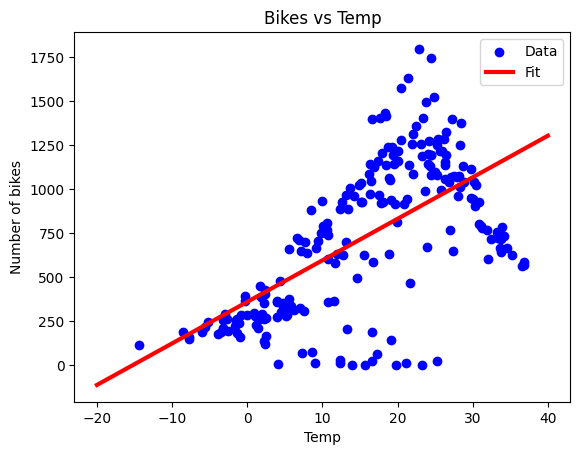

In [18]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [19]:
# Multi Linear Regression
_, X_train_all, y_train_all = get_xy(train, "Rented_Bike_Count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(valid, "Rented_Bike_Count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "Rented_Bike_Count", x_labels=df.columns[1:])

In [20]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [21]:
all_reg.score(X_test_all, y_test_all)

0.40700992938762526

In [22]:
y_pred_lr = all_reg.predict(X_test_all)

In [23]:
# To get model prediction history
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [24]:
# Normalizing the data
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [25]:
# Model for regression
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [26]:
# Setting compiler , loss ,  and learning rate
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [27]:
# model training
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

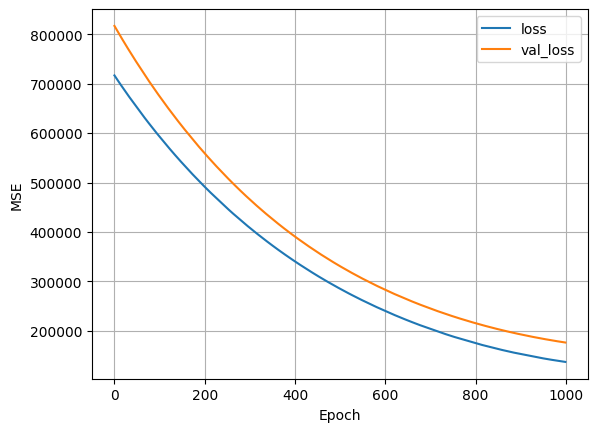

In [28]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


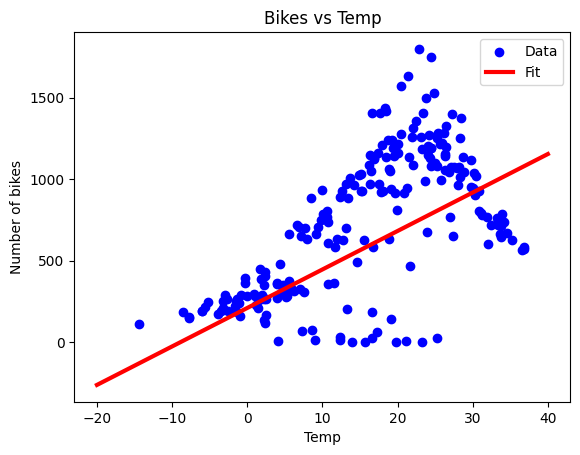

In [29]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [30]:
# Neural Net
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [31]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=100
)

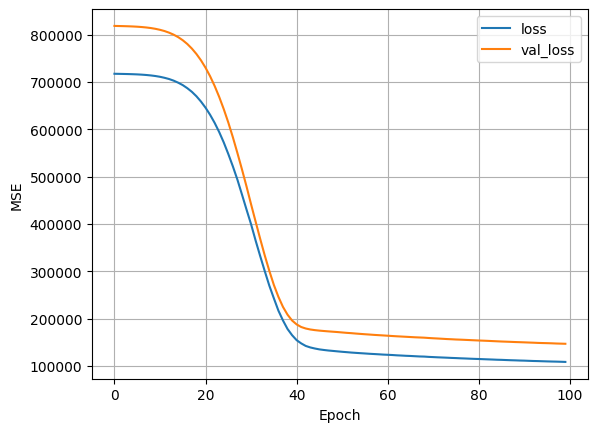

In [32]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


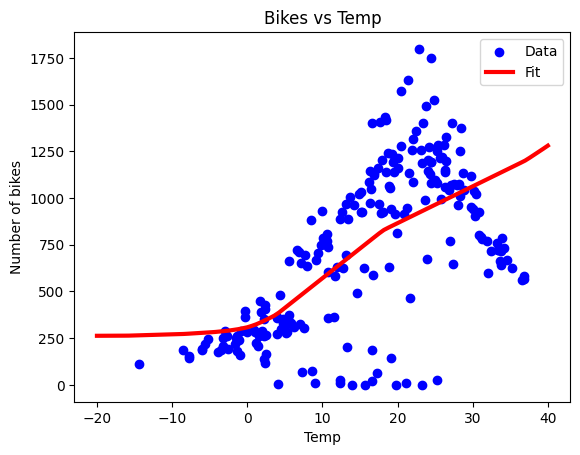

In [33]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [34]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

In [35]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [36]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

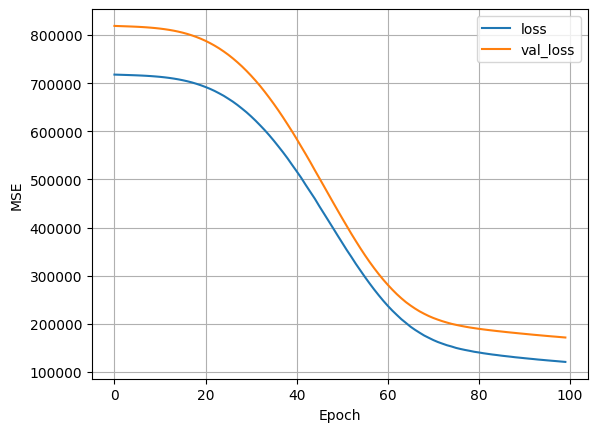

In [37]:
plot_loss(history)

In [38]:
# Predictions
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [39]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [40]:
MSE(y_pred_lr, y_test_all)

np.float64(115514.77176442817)

In [41]:
MSE(y_pred_nn, y_test_all)

np.float64(144275.5848258056)

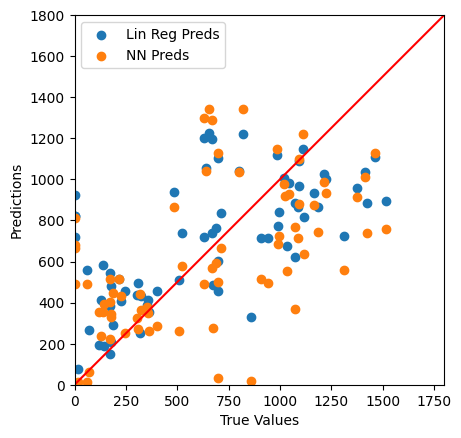

In [42]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")